### Dans ce mini-projet de Data Science, nous proposons de créer un algorithme de machine learning qui permettra de dire si un nouveau joueur de la ligue NBA sera encore ou non en NBA 05 ans plus tard en se basant sur une moyenne de performance à l'année. 

Le but sera de prédire la classe du joueur (1 si le joueur sera encore dans la ligue dans 05 ans et 0 sinon) en fonction des caractéristiques mises à disposition.
Pour celà, voici les différentes étapes par lesquelles nous passerons :
   - Faire une exploration des données en affichant la forme de notre dataset et le type de valeur de chaque attribut. Afficher s'il y a les valeurs manquantes ou nulles et si oui, combien ?

   - Prétraiter les données issues d'une source(data.world sur google) en supprimant les observations contenant les valeurs manquantes si on ne trouve pas de relations permettant de déduire la valeur manquante, en supprimant les doublons et en les organisant dans un format facile à utiliser.
   
   - Sélection du modèle : Il existe de nombreux algorithmes d'apprentissage automatique que nous pouvons utiliser pour prédire la classe du joueur. Parmi les options les plus courants figurent la régression logistique, les forêts aléatoires, le SVM, et K-NN. Nous pourrions utiliser des techniques telles que la validation croisée pour évaluer les performances de chaque algorithme et choisir celui qui fonctionne le mieux pour vos données.

   -  Évaluation du modèle : Une fois le modèle choisi, nous allons devoir évaluer ses performances sur un ensemble de données de test. Cela nous donnera une idée de la capacité du modèle à s'adapter à de nouvelles données. 
   -  Ajustement du modèle : Si notre modèle n'est pas aussi performant que nous le souhaitons, nous pourrions essayer de modifier les hyperparamètres ou l'ensemble des caractéristiques pour voir si cela améliore les performances.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import svm


In [2]:
nba = pd.read_csv("C:/Users/KENFACK/Downloads/nba_logreg.csv")
nba.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [3]:
#Vérifier les valeurs abérrantes
nba.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [4]:
nba.isna().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

On a observé ci-dessus qu'il y a 11 cases vides. Faisons un heatmap qui permet de voir la correlation entre les valeurs. Ceci nous permettra de savoir si on peut calculer 3P% nous meme et completer.

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs    float64
dtype: object


<Axes: >

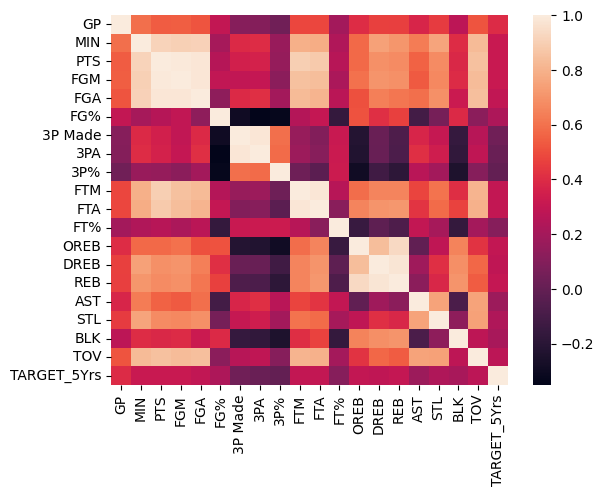

In [5]:
print(nba.dtypes)
sns.heatmap(nba.iloc[:,1:].corr())

On remarque que 3P% dépend moyennement( 0.5 ou 0.6) de 3PA et 3P Made. Ceci ne nous permet pas d'etre sur de calculer 3P% en fonction de 3PA et 3P Made.
Nous allons donc drop ces valeurs.

In [6]:
nba.dropna(axis=0, inplace=True)
print(nba.isnull().sum())



Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64


On a supprimé les lignes nulles ou manquantes

In [15]:
nba.shape

(1329, 21)

In [18]:
nba.duplicated().sum()

11

On remarque 11 doublons dans notre dataset. Nous allons les supprimer

notre dframe a 1329 lignes et 21 colonnes

In [13]:
nba.drop_duplicates()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


Après avoir supprimer les doublons on remarque que notre dataset est passé de 1329 lignes à 1318 lignes ce qui correspond effectivement au nombre de doublons qui ont été supprimés.

In [7]:
y= nba['TARGET_5Yrs']
X= nba.drop('TARGET_5Yrs', axis= 1).drop('Name',axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [9]:
clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5),n_estimators= 50, random_state=42)
param_grid = {
    "n_estimators" : [10,20,30,40,50,60,70,80,90,100]
} 
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"la meilleure valeur d'estimateur est {grid_search.best_params_} avec une précision de {grid_search.best_score_:.2f}")


la meilleure valeur d'estimateur est {'n_estimators': 80} avec une précision de 0.67


In [10]:
print(grid_search.best_estimator_)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=80, random_state=42)


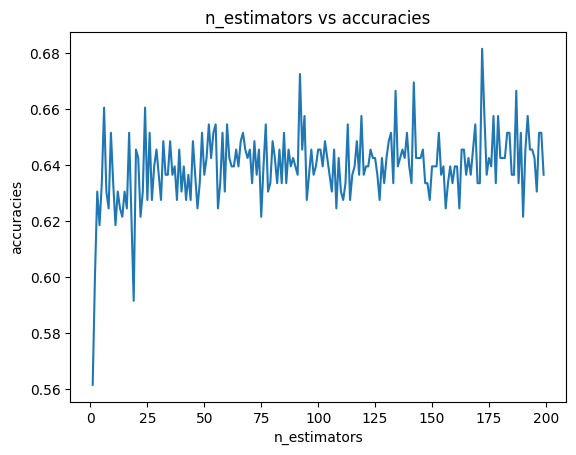

In [31]:
n_estimators = list(range(1, 200))
accuracies = []
 
for n in n_estimators:
    clf = AdaBoostClassifier(tree.DecisionTreeClassifier(), n_estimators=n)
 
    #Entrainement du RandomTree
    clf.fit(X_train, y_train)
    # Predictions
    y_predn = clf.predict(X_test)
    # Eval
    accuracies.append(accuracy_score(y_test, y_predn))
#Tracer du graphique
plt.plot(n_estimators, accuracies)
plt.xlabel('n_estimators')
plt.ylabel('accuracies')
plt.title('n_estimators vs accuracies')
plt.show()


In [19]:
best_clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5),n_estimators= 80, random_state=42)

best_clf.fit(X_train, y_train)
y_pred= best_clf.predict(X_test)
score = best_clf.score(X_test,y_test)
print(score)



0.6666666666666666


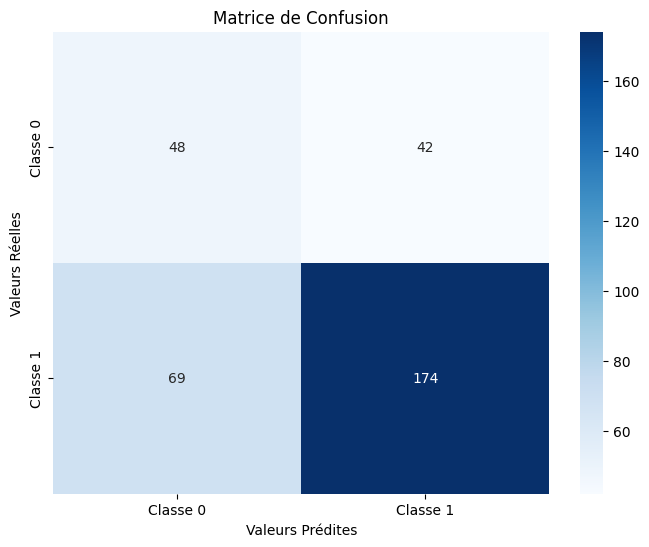

In [20]:
conf_matrix = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

La matrice de confusion permet de savoir le nombre d'éléments prédits classe 0/1 et qui était réellement classe 0/1. On peut par exemple remarquer que notre modèle a prédit 69 classes 0 qui étaient vraiment classes 0 et 71 classes 0 qui étaient classe 1. Bien qu'il s'en sort  bien dans la prédiction des classes 1, il a beaucoup de lacunes en ce qui concerne la prédiction des classes 0

In [ ]:
y_pred= best_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)

print("Sensibilité (rappel):", recall)

0.7398568019093079
Sensibilité (rappel): 0.7989690721649485


Le modèle suivant n'est pas très adapté

In [ ]:
predictions= best_clf.predict(nba.iloc[:,1:-1])
print(predictions)

[0. 1. 0. ... 1. 1. 0.]


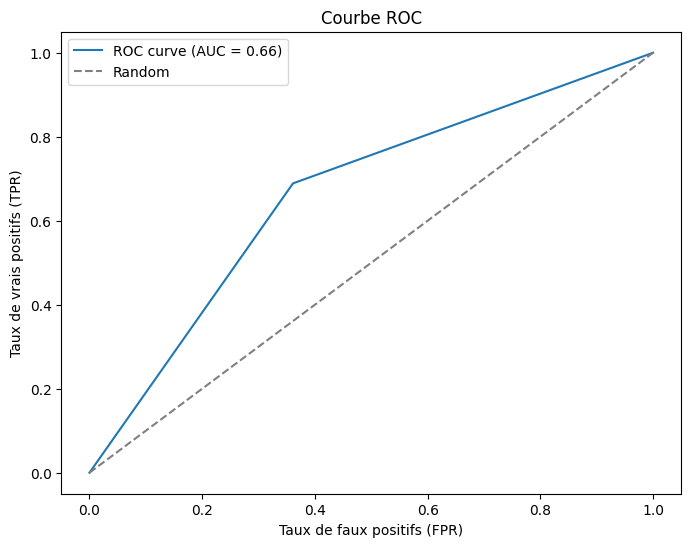

In [ ]:
# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_pred, y_test)

# Calcul de l'aire sous la courbe ROC (AUC-ROC)
auc = roc_auc_score(y_pred, y_test)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [ ]:
y_pred = (y_pred >= 0.66).astype(int)
print(y_pred)


[1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1]
333


En remarquant que les performance de notre modèle peu satisfaisante, nous avons décidé d'utiliser la validatoin croisée pour améliorer sa performance

In [23]:
# Définir le nombre de folds pour la validation croisée
num_folds = 5 

# Définir la stratégie de validation croisée (par exemple, KFold)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

scores = cross_val_score(best_clf, X, y, cv=kf)

# Afficher les scores de validation croisée
print("Scores de validation croisée :", scores)

# Calculer la moyenne et l'écart type des scores
mean_score = scores.mean()
std_dev = scores.std()

print("Moyenne des scores :", mean_score)
print("Écart type des scores :", std_dev)



Scores de validation croisée : [0.68421053 0.67293233 0.66541353 0.62030075 0.67924528]
Moyenne des scores : 0.6644204851752021
Écart type des scores : 0.022940832101556785


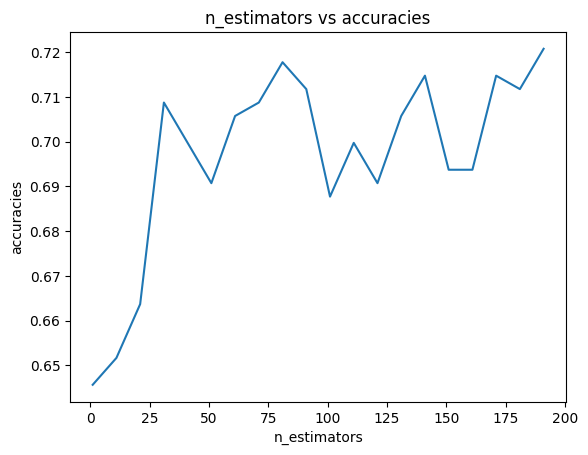

In [34]:
n_estimators = list(range(1, 200,10))
accuracies = []
 
for n in n_estimators:
    clf = RandomForestClassifier(n)
 
    #Entrainement du RandomTree
    clf.fit(X_train, y_train)
    # Predictions
    y_predn = clf.predict(X_test)
    # Eval
    accuracies.append(accuracy_score(y_test, y_predn))
#Tracer du graphique
plt.plot(n_estimators, accuracies)
plt.xlabel('n_estimators')
plt.ylabel('accuracies')
plt.title('n_estimators vs accuracies')
plt.show()

In [42]:
# Définir le nombre de folds pour la validation croisée
num_folds = 5 

# Définir la stratégie de validation croisée (par exemple, KFold)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
n_clf=RandomForestClassifier()
accuracies = cross_val_score(n_clf, X, y, cv=kf)

# Afficher les scores de validation croisée
print("Scores de validation croisée :", accuracies)

# Calculer la moyenne et l'écart type des scores
mean_accuracy = accuracies.mean()
std_dev = accuracies.std()

print("Moyenne des scores :", mean_accuracy)
print("Écart type des scores :", std_dev)

Scores de validation croisée : [0.7481203  0.69548872 0.65789474 0.65413534 0.69056604]
Moyenne des scores : 0.6892410270960421
Écart type des scores : 0.0338306296243899


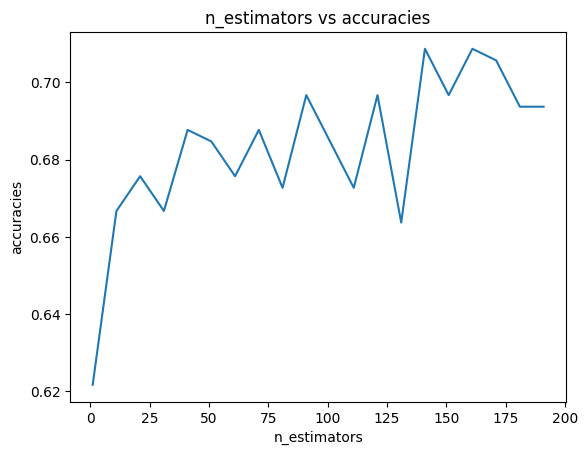

In [36]:
n_estimators = list(range(1, 200,10))
accuracies = []
 
for n in n_estimators:
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n)
 
    #Entrainement du RandomTree
    clf.fit(X_train, y_train)
    # Predictions
    y_predn = clf.predict(X_test)
    # Eval
    accuracies.append(accuracy_score(y_test, y_predn))
#Tracer du graphique
plt.plot(n_estimators, accuracies)
plt.xlabel('n_estimators')
plt.ylabel('accuracies')
plt.title('n_estimators vs accuracies')
plt.show()

In [38]:
# Définir le nombre de folds pour la validation croisée
num_folds = 5 

# Définir la stratégie de validation croisée (par exemple, KFold)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

scores = cross_val_score(clf, X, y, cv=kf)

# Afficher les scores de validation croisée
print("Scores de validation croisée :", scores)

# Calculer la moyenne et l'écart type des scores
mean_score = scores.mean()
std_dev = scores.std()

print("Moyenne des scores :", mean_score)
print("Écart type des scores :", std_dev)

Scores de validation croisée : [0.76315789 0.68421053 0.66917293 0.66541353 0.66037736]
Moyenne des scores : 0.6884664491417223
Écart type des scores : 0.03818271502365487


In [47]:
# Créer un classificateur SVM linéaire
sv = svm.SVC(kernel='linear')

# Entraîner le classificateur SVM sur l'ensemble d'entraînement
sv.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = sv.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test,predictions)
print("Précision du modèle SVM :", accuracy)

Précision du modèle SVM : 0.7417417417417418
